# **HIP Breast Cancer Screening**

|Group|Size|Breast Cancer|-|All Other|
|-----|----|-------------|-|---------|
|     |    |  No., Rate|| No., Rate|
|Treatment - Screened| 20,200     |23, 1.1     |-|428, 21 |
|Treatment - Refused| 10,800     |16, 1.5     |-|409, 38 |
|Treatment - Total| 31,000     |39, 1.3     |-|837, 27 |
|Control - Total| 31,000     |63, 2.0     |-|879, 28 |

In [1]:
# Calculations
print('Death Rates in treatment group: ', 39/31000)
print('Death Rates in   control group: ', 63/31000)

Death Rates in treatment group:  0.0012580645161290322
Death Rates in   control group:  0.002032258064516129


**We perform hypothesis testing to check whether the difference in death rates between the treatment and the control group is significant enough, to establish that offering mammography reduces the risk of death from breast cancer.**

## **Importing the necessary libraries**

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy.stats import binom

[Why use a z test rather than a t test with proportional data?](https://stats.stackexchange.com/questions/90893/why-use-a-z-test-rather-than-a-t-test-with-proportional-data#:~:text=The%20reason%20you%20can%20use,have%20to%20take%20into%20account.)

The reason you can use a $z-test$ with proportion data is because the standard deviation of a proportion is a function of the proportion itself. Thus, once you have estimated the proportion in your sample, you don't have an extra source of uncertainty that you have to take into account. As a result, you can use the normal distribution instead of the t distribution as your sampling distribution. 

If you have more than 2 groups, you can use logistic regression, as you note. You do have to know the $n_js$ in each group however. If you just had a set of observed proportions, but didn't know how many trials had been observed to generate those proportions, you cannot run a proper test of whether the proportions differed.

## **Binomial Distribution**

**Null hypothesis $(H_0): π = 0.002$**

**Alternative hypothesis $(H_a): π < 0.002$**

* The total number of trials / observations = 31,000
* The hypothesized probability = 0.002
* The number of deaths due to breast cancer in the treatment group = 39

In [3]:
# Finding the p-value using the Binomial distribution
# print("The p-value is", 
#       round(stats.binom_test(x = 39, n = 31000, p = 0.002, alternative = "less" ), 4))
result = stats.binomtest(k=39, n=31000, p=0.002, alternative="less")
print("The p-value is", round(result.pvalue, 4))
result

The p-value is 0.0012


BinomTestResult(k=39, n=31000, alternative='less', statistic=0.0012580645161290322, pvalue=0.0011699673957838207)

Since the **p-value (0.0012) is less than 0.05, we reject the null hypothesis at a 95% confidence level**. This implies that we have sufficient evidence to conclude that offering mammography reduces the risk of death from breast cancer.

Now, let's plot the **probability distribution ~ Binom( n = 31000, p = 0.002 )**

In [4]:
n = 31000
p = 0.002
k = np.arange(0, 200)

# Probabilities, calculated using ~ Binom( 31000, 0.002 ), for each value of k
# dist = [binom.pmf(i, n, p) for i in k]    
binomial = binom(n, p)
dist = binomial.pmf(k)

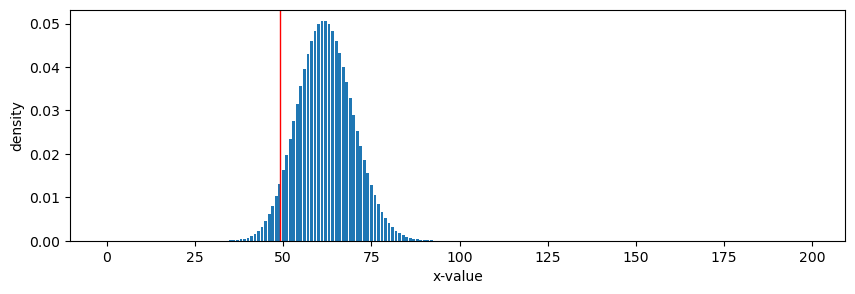

In [5]:
plt.figure(figsize = (10, 3))
bar = plt.bar(k, dist)
# plt.axvline(50, color = 'red', linestyle = '-', linewidth=1)
plt.axvline(binomial.ppf(0.05), color = 'red', linestyle = '-', linewidth=1)
plt.xlabel("x-value")
plt.ylabel("density")
plt.show()

In the above plot, the **red line shows the cut-off region** for a significance level of 0.05, i.e., the area under the curve on the left side of the red line is 0.05 or 5% of the probability density under the curve. 

## **Normal Distribution**

We can also validate our result using another test, called the **proportion test**. 

A hypothesis test for a proportion is used when you are **comparing one group to a known or hypothesized population proportion value**. The **hypothesized population proportion in our case study is equal to 63/31000 = 0.002**

There is a rule stating that **if $n*p \ge 10$ and $n*(1-p) \ge 10$, then the distribution of sample proportions is approximately normal and can be estimated using the normal distribution, i.e., using the z - statistic**. 

As **the condition in the rule is satisfied for our case study**, we can use the normal distribution for the proportion test.

In [6]:
n = 31000
p = 0.002
if ((n * p) >= 10) and ((n * (1 - p)) >= 10):
    print('The distribution of sample proportions is approximately normal')
else:
    print('The distribution of sample proportions is not approximately normal')

The distribution of sample proportions is approximately normal


**Null hypothesis $(H_0): π = 63/31000 = 0.002$**

**Alternative $(H_a): π < 0.002$**

* count: The number of successes in trials / observations
* nobs: The total number of trials / observations
* value: The value of the null hypothesis (proportion)

In [7]:
stat, pvalue = proportions_ztest(count=39, nobs=31000, value=0.002, alternative="smaller")
print("The p-value is", pvalue)
stat

The p-value is 0.00011423176454888235


-3.6852664185288297

Since the **p-value (0.00011) is less than 0.05, we reject the null hypothesis at a 95% confidence level**. This implies that we have sufficient evidence to conclude that offering mammography reduces the risk of death from breast cancer.

**proportions_ztest** returns:
- zstat: float. test statistic for the z-test
- p-value: float. p-value for the z-test

zstat is denoted by the following formula:
$$ \frac{(\overline X - \mu)}{\Big( \frac{\sigma}{\sqrt{n}} \Big)} $$

where:
- $ \overline X $: sample mean
- $ \mu $: population mean
- $ \sigma $: population standard deviation
- $ n $: sample size

**Hence, we conclude that this study suggests that offering mammography is indeed helpful and can reduce the risk of death from breast cancer.**